In [4]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.pipeline import make_pipeline

%matplotlib inline

from sklearn.model_selection import train_test_split



In [83]:
# læs data 
df_est = pd.read_pickle('job_kurser.pkl')

print(df_est.head())


def dan_xy(index) :
    y = np.array((np.log(df_est.iloc[index])))
    X = np.array((np.log(df_est.iloc[index+14]))).reshape(-1, 1)
    return X, y

X, y = dan_xy(4)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_eval, y_train, y_eval = train_test_split(X_dev, y_dev, test_size=.25, random_state=2)

X_train


            Carlsberg  Coloplast  Danske Bank     DSV  Jyske Bank  Nordea  \
2008-01-31    497.248       89.5      187.387  110.00     370.798   83.75   
2008-02-29    441.549       82.4      171.193   99.50     301.564   68.00   
2008-03-31    491.597       81.4      172.350   94.25     303.423   74.25   
2008-04-30    516.621       88.1      166.566  106.75     305.281   80.25   
2008-05-31    524.693       93.0      157.081  122.25     311.322   82.75   

            Novo Nordisk  Novozymes  Vestas   Tryg    ...     DSV_jobs  \
2008-01-31          65.0      117.4    78.6  552.0    ...           19   
2008-02-29          61.8       80.9    72.9  497.5    ...           38   
2008-03-31          67.5       86.9    74.9  516.0    ...           13   
2008-04-30          64.8       87.4    84.3  516.0    ...           13   
2008-05-31          64.6       90.8    83.8  516.0    ...           13   

            Jyske_Bank_jobs  Nordea_jobs  Novo_Nordisk_jobs  Novozymes_jobs  \
2008-01-31   

C:\Users\Peter Ottosen\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([[      -inf],
       [4.2341065 ],
       [4.96689237],
       [1.79175947],
       [2.39789527],
       [3.58706819],
       [3.40578683],
       [4.43877316],
       [1.38629436],
       [4.45667018],
       [3.76120012],
       [2.39789527],
       [4.15888308],
       [4.3000028 ]])

In [77]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_eval, y_train, y_eval = train_test_split(X_dev, y_dev, test_size=.25, random_state=2)

X_train

array([[2.56494936],
       [5.65599181],
       [5.74082775],
       [1.79175947],
       [3.8918203 ],
       [4.73706649],
       [6.22837095],
       [5.0567616 ],
       [3.40119738],
       [4.50865929],
       [4.41582401],
       [3.13549422],
       [4.42843301],
       [4.53259949]])

## Regression

## Lasso

### Pure lasso

In [84]:
perform = []

alphas = np.logspace(-10,-3,33)

for alpha_ in alphas:
    
    pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=alpha_, random_state=1))
    pipe_lasso.fit(X_train, y_train)
    perform.append([alpha_, np.sqrt(mse(pipe_lasso.predict(X_eval),y_eval)), 
                    np.sqrt(mse(pipe_lasso.predict(X_test),y_test))])
    
pf = pd.DataFrame(perform)
headers = ['alpha', 'RMSE_eval', 'RMSE_test']
pf.columns = headers
pf.set_index('alpha')
print(pf)
pf.nsmallest(1, 'RMSE_test')



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

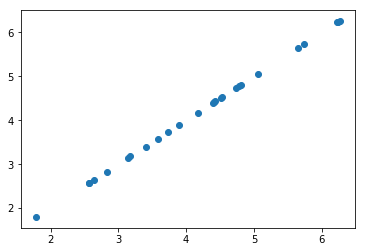

In [81]:
pipe_lasso = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=0.00001, random_state=1))
pipe_lasso.fit(X_train, y_train)
y_hat = pipe_lasso.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_hat)


### kFold

In [ ]:
from sklearn.model_selection import KFold

kfolds = KFold(n_splits=5)

mseCV = []

lambdas =  np.logspace(-5, 4, 12)

for lambda_ in lambdas:
   
    pipe_lassoCV = make_pipeline(PolynomialFeatures(include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=lambda_, random_state=1))    
    mseCV_ = []
    
    for train_idx, val_idx in kfolds.split(X_dev, y_dev):
        X_train, y_train = X_dev[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 

        pipe_lassoCV.fit(X_train, y_train)
        
        msetest = mse(pipe_lassoCV.predict(X_test), y_test)
        mseCV_.append(msetest)    
    mseCV.append(np.mean(mseCV_))

optimal = pd.Series(mseCV,index=lambdas).nsmallest(1)
print("Optimal lambda")
print("lambda"," "*5, "Mean MSE")
print(optimal)
